# 回測

## 夏普率及最大虧損

### 夏普率

夏普率的定義：

$$訊息比率=\frac{超額報酬平均值}{超額報酬標準差}$$

其中，

$$超額報酬 = 投資組合報酬 - 比較基準報酬$$

In [1]:
import sys

In [2]:
sys.path.append('../modules')

In [3]:
# 網路上有人提到在使用pandas_datareader前加入這一行，果然可以
# ref: https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import ffn

%matplotlib inline

from pandas import Series, DataFrame
import numpy as np

from datetime import datetime
import crawler

In [4]:
import pandas_datareader.data as web
df = web.DataReader("TSLA", 'google', datetime(2016,1,1))

C:\Users\Malo\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


RemoteDataError: Unable to read URL: https://finance.google.com/finance/historical?q=TSLA&startdate=Jan+01%2C+2016&enddate=Aug+27%2C+2018&output=csv
Response Text:
b'<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We\'re sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can\'t process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: center; border-top: 1px solid #dfdfdf;"><a href="https://www.google.com">Google Home</a></div></body></html>'

In [5]:
# 使用DataReader讀不到，改用另一個自製的function試就ok

# 讀取從指定日期之後的股價資訊
df = crawler.get_quotes("TSLA", datetime(2016,1,1))

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,230.720001,231.380005,219.000000,223.410004,223.410004,6827100
2016-01-05,226.360001,226.889999,220.000000,223.429993,223.429993,3186800
2016-01-06,220.000000,220.050003,215.979996,219.039993,219.039993,3779100
2016-01-07,214.190002,218.440002,213.669998,215.649994,215.649994,3554300
2016-01-08,217.860001,220.440002,210.770004,211.000000,211.000000,3628100


In [7]:
# 讀取從指定日期之後的股價資訊
df = crawler.get_quotes("2330.tw", datetime(2016,1,1))

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-21,239.0,241.0,238.5,241.0,241.0,12014127.0
2018-08-22,241.5,242.5,240.5,242.0,242.0,12614240.0
2018-08-23,243.0,244.5,243.0,244.5,244.5,14839240.0
2018-08-24,245.5,246.0,243.0,243.5,243.5,14355943.0
2018-08-27,246.0,246.5,244.5,245.0,245.0,15127000.0


In [9]:
import kchart

../modules\kchart.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Date'] = df.index.date
../modules\kchart.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ma05'] = pd.Series.rolling(df['Close'], window=5).mean()
../modules\kchart.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ma20'] = pd

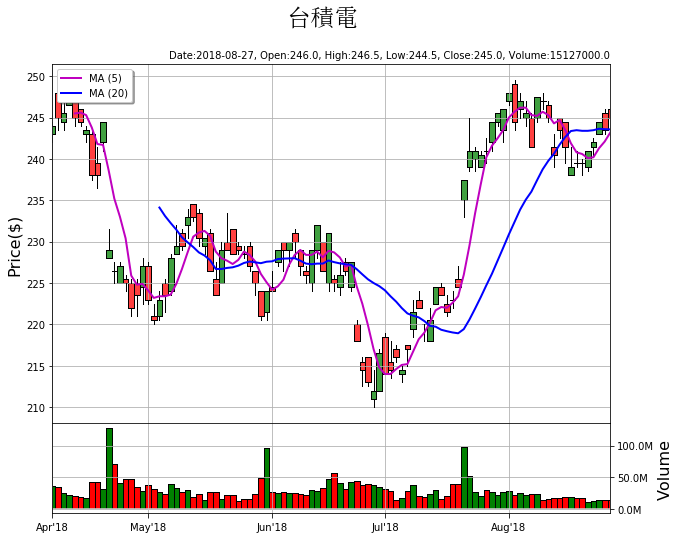

In [10]:
kchart.draw(df[-100:], title="台積電")

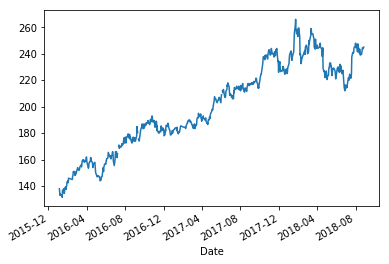

In [11]:
df['Close'].plot()

In [12]:
# 手動設定進出場日期
# 進出場日期之後會由策略自動產生

#進場日期
entry = datetime(2016,2,10)
#出場日期
exit = datetime(2016,4,6)

In [13]:
dailyRet = df['Close'][entry:exit].pct_change()

In [14]:
#假設無風險利率為 4%
#假設一年有252個交易日
excessRet = dailyRet - 0.04/252

sharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)

In [15]:
sharpeRatio

2.2050121031605565

### 最大虧損額及最大虧損持續時間

In [16]:
cumRet = np.cumprod(1 + excessRet)

In [17]:
ffn.core.calc_max_drawdown(cumRet)

-0.05277813430885703

In [18]:
dd_series = ffn.core.to_drawdown_series(cumRet)

In [19]:
dd_details = ffn.core.drawdown_details(dd_series)

In [20]:
dd_details

,start,end,days,drawdown
0,2016-02-15 00:00:00,2016-02-16 00:00:00,1,0
1,2016-02-19 00:00:00,2016-03-01 00:00:00,11,-0.0204928
2,2016-03-04 00:00:00,2016-03-10 00:00:00,6,-0.013459
3,2016-03-15 00:00:00,2016-03-17 00:00:00,2,-0.00977411
4,2016-03-22 00:00:00,2016-03-30 00:00:00,8,-0.0131288
5,2016-04-01 00:00:00,2016-04-06 00:00:00,5,-0.0527781


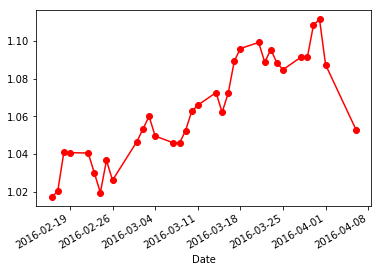

In [21]:
cumRet.plot(style='ro-')

In [22]:
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [23]:
DrawDownAnalysis(cumRet)

(-0.05277813430885703, 11)